In [1]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

C:\Users\rissu\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\rissu\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


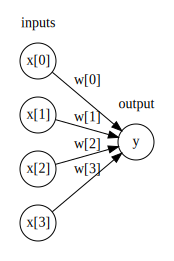

In [2]:
mglearn.plots.plot_logistic_regression_graph()

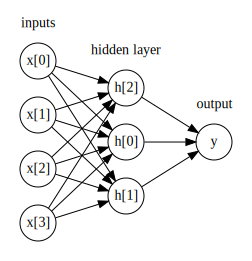

In [3]:
mglearn.plots.plot_single_hidden_layer_graph()

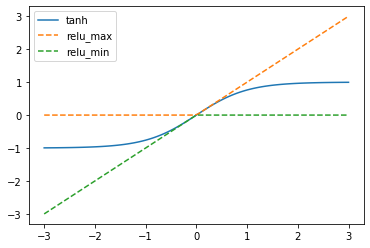

In [4]:
line=np.linspace(-3,3,100)
pl.plot(line,np.tanh(line),label='tanh')
pl.plot(line,np.maximum(line,0),label='relu_max',linestyle='--')
pl.plot(line,np.minimum(line,0),label='relu_min',linestyle='--')
pl.legend()

In [5]:
np.maximum([-1,-2,3],0)

array([0, 0, 3])

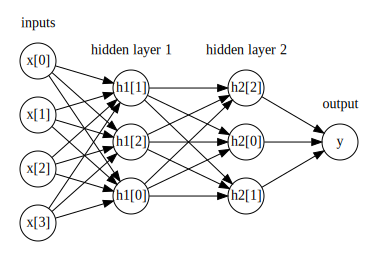

In [6]:
mglearn.plots.plot_two_hidden_layer_graph()

Text(0, 0.5, 'Feature 1')

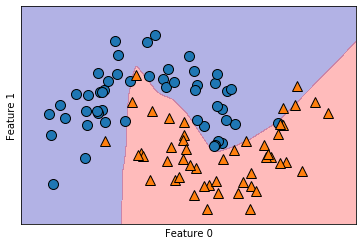

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X,y=make_moons(n_samples=100,noise=0.25,random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                    random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
pl.xlabel("Feature 0")
pl.ylabel("Feature 1")

In [8]:
mlp.score(X_train,y_train),mlp.score(X_test,y_test)

(0.9866666666666667, 0.88)

Text(0, 0.5, 'Feature 1')

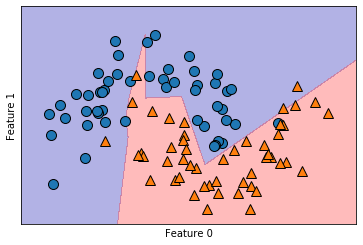

In [9]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=10).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
pl.xlabel("Feature 0")
pl.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

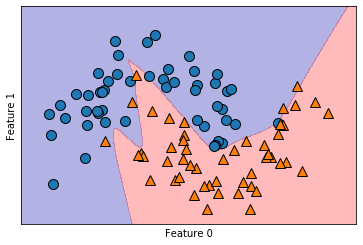

In [10]:
mlp = MLPClassifier(solver='lbfgs',activation='tanh',
    random_state=0,hidden_layer_sizes=[10,10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
pl.xlabel("Feature 0")
pl.ylabel("Feature 1")

In [11]:
mlp.score(X_train,y_train),mlp.score(X_test,y_test)

(0.9866666666666667, 0.84)

C:\Users\rissu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\rissu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


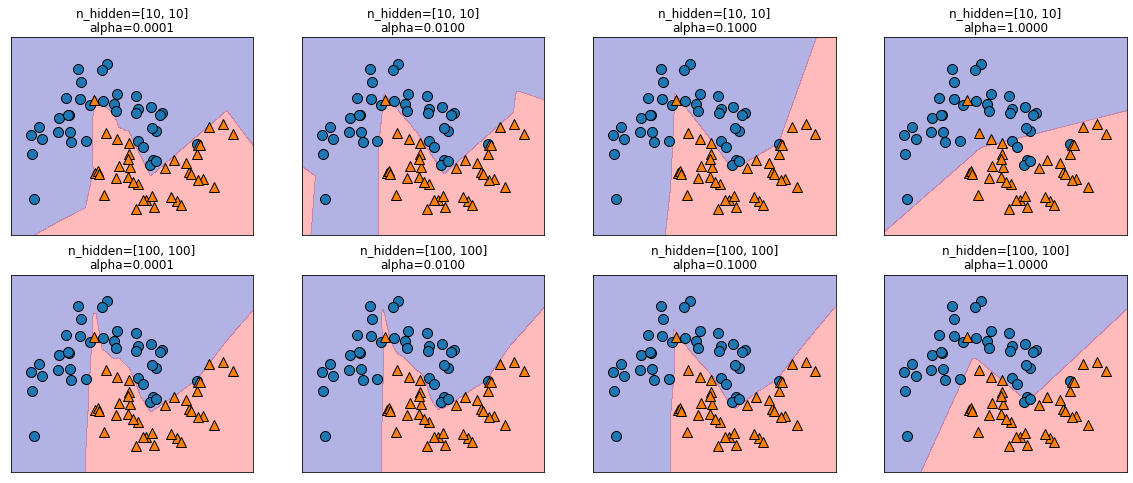

In [12]:
score=[]
fig,axes=pl.subplots(2,4,figsize=(20,8))
for axx,n_hidden_nodes in zip(axes,[10,100]):
    for ax,alpha in zip(axx,[0.0001,0.01,0.1,1]):
        mlp=MLPClassifier(solver='lbfgs',random_state=0, hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],
                         alpha=alpha)
        mlp.fit(X_train,y_train)
        score.append([mlp.score(X_train,y_train),mlp.score(X_test,y_test)])
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

In [13]:
score

[[0.9866666666666667, 0.84],
 [0.9866666666666667, 0.88],
 [0.9866666666666667, 0.88],
 [0.88, 0.76],
 [0.9866666666666667, 0.88],
 [0.9866666666666667, 0.84],
 [0.9866666666666667, 0.84],
 [0.96, 0.84]]

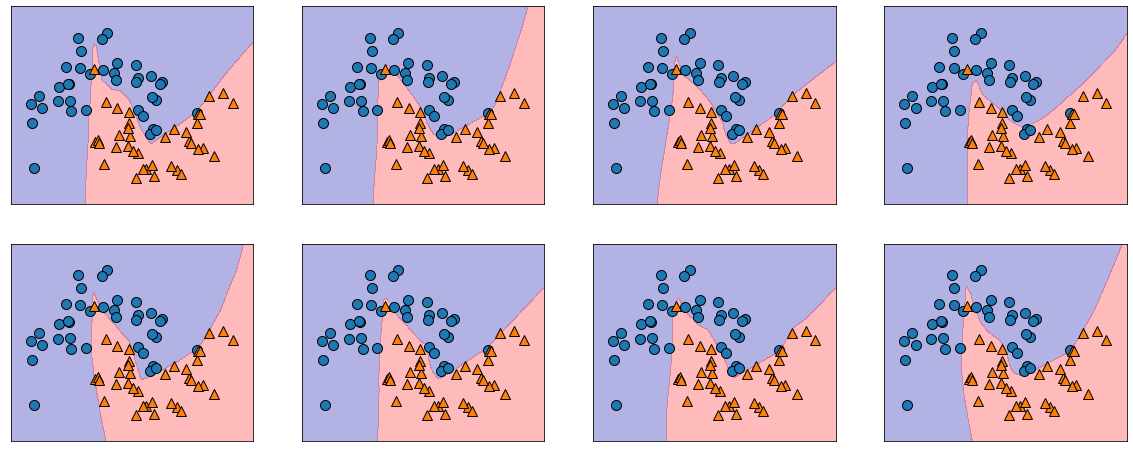

In [14]:
fig, axes = pl.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
    hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [15]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print("{:}".format(cancer.data.max(axis=0)))

[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [16]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,
                                              random_state=0)
mlp=MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)
mlp.score(X_train,y_train),mlp.score(X_test,y_test)

(0.9389671361502347, 0.916083916083916)

In [17]:
mean_on_train=X_train.mean(axis=0)
std_on_train=X_train.std(axis=0)
X_train_scaled=(X_train-mean_on_train)/std_on_train
X_test_scaled=(X_test-mean_on_train)/std_on_train
mlp=MLPClassifier(random_state=0).fit(X_train_scaled,y_train)
mlp.score(X_train_scaled,y_train),mlp.score(X_test_scaled,y_test)

C:\Users\rissu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(0.9906103286384976, 0.965034965034965)

In [18]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


Accuracy on training set: 0.988
Accuracy on test set: 0.972


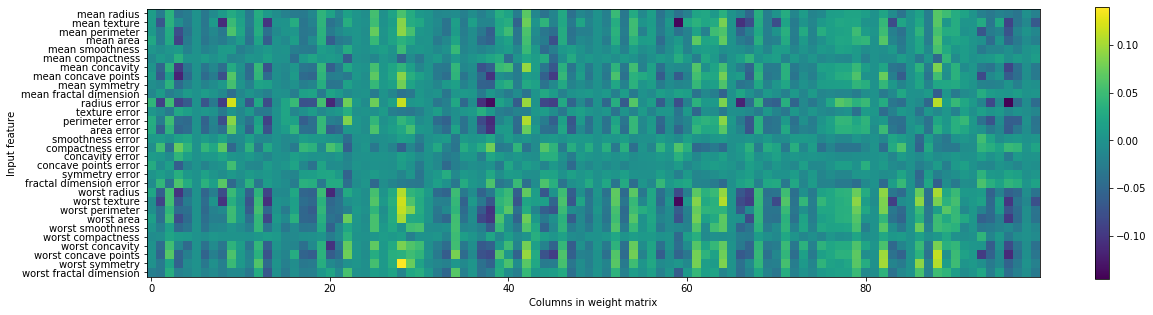

In [21]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))
pl.figure(figsize=(20, 5))
pl.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
pl.yticks(range(30), cancer.feature_names)
pl.xlabel("Columns in weight matrix")
pl.ylabel("Input feature")
pl.colorbar()

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs,make_circles
X,y=make_circles(noise=0.25,factor=0.5,random_state=1)

In [46]:
y

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [53]:
y_named=np.array(["Blue","Red","G"])[y]
from sklearn.datasets import load_iris
iris=load_iris()
print(iris.target)
iris.target_names[iris.target]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [65]:
y_named=np.array(["Blue","Red","G"])[y]
y_named

array(['Red', 'Red', 'Blue', 'Red', 'Red', 'Blue', 'Blue', 'Red', 'Red',
       'Red', 'Red', 'Blue', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue',
       'Red', 'Blue', 'Blue', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Red',
       'Blue', 'Blue', 'Blue', 'Red', 'Red', 'Red', 'Red', 'Red', 'Blue',
       'Blue', 'Red', 'Blue', 'Blue', 'Red', 'Red', 'Red', 'Blue', 'Red',
       'Blue', 'Blue', 'Red', 'Blue', 'Red', 'Blue', 'Red', 'Blue',
       'Blue', 'Red', 'Blue', 'Blue', 'Red', 'Blue', 'Red', 'Blue', 'Red',
       'Red', 'Blue', 'Blue', 'Red', 'Blue', 'Red', 'Blue', 'Red', 'Red',
       'Blue', 'Red', 'Red', 'Blue', 'Red', 'Blue', 'Red', 'Red', 'Blue',
       'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Red', 'Blue', 'Blue',
       'Red', 'Red', 'Blue', 'Blue', 'Red', 'Red', 'Blue', 'Red', 'Blue',
       'Red', 'Blue', 'Blue'], dtype='<U4')

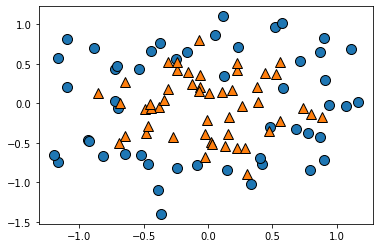

In [67]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [73]:
X_train, X_test,y_train, y_test=train_test_split(X, y_named, random_state=0)
gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [74]:
gbrt.decision_function(X_test)>0

array([ True, False, False, False,  True,  True, False,  True,  True,
        True, False,  True,  True, False,  True, False, False, False,
        True,  True,  True,  True,  True, False, False])

In [75]:
gbrt.predict(X_test)

array(['Red', 'Blue', 'Blue', 'Blue', 'Red', 'Red', 'Blue', 'Red', 'Red',
       'Red', 'Blue', 'Red', 'Red', 'Blue', 'Red', 'Blue', 'Blue', 'Blue',
       'Red', 'Red', 'Red', 'Red', 'Red', 'Blue', 'Blue'], dtype='<U4')

In [87]:
greater_zero=(gbrt.decision_function(X_test)>0).astype(int)
pred=gbrt.classes_[greater_zero]
np.all(pred==gbrt.predict(X_test))

True

In [91]:
decision_function=gbrt.decision_function(X_test)
decision_function.min(),decision_function.max()

(-7.69097177301218, 4.289866676868515)

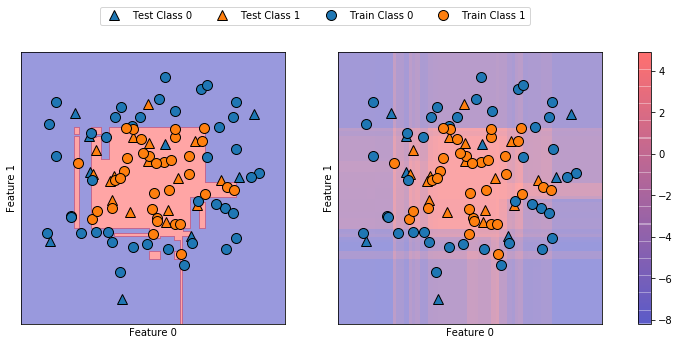

In [110]:
fig,axes=pl.subplots(1,2,figsize=(13,5))
mglearn.plots.plot_2d_separator(gbrt,X,ax=axes[0],alpha=.4,fill=True,
                               cm=mglearn.cm2)
scores_image=mglearn.tools.plot_2d_scores(gbrt,X,ax=axes[1],alpha=0.4,
                               cm=mglearn.ReBl)
for ax in axes:
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,markers='^',ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,markers='o',ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar=pl.colorbar(scores_image,ax=axes.tolist())
axes[0].legend(["Test Class 0","Test Class 1","Train Class 0",
               "Train Class 1"],ncol=4,loc=(0.3,1.1))
